#                 Applied Data Science IBM Capstone Project

# Car Accident Severity

# Table of contents

Introduction: Business Problem
Data
Methodology
Exploratory Data Analysis
Modeling, Testing and Evaluation
Results and Discussion
Conclusion

# Introduction: Business Problem

Road Accident refers to any accident involving at least one road vehicle, occurring on a road open to public circulation, and in which at least one person is injured or killed. Intentional acts (Murder, suicide) and natural disasters are excluded.
Road traffic injuries cause considerable economic losses to individuals, their families, and to nations as a whole. These losses arise from the cost of treatment as well as lost productivity for those killed or disabled by their injuries, and for family members who need to take time off work or school to care for the injured. Road traffic crashes cost most countries 3% of their gross domestic product.
Analysing a significant range of factors, including weather conditions, special events, roadworks, traffic jams among others, an accurate prediction of the severity of the accidents can be performed.
These insights, could allow law enforcement bodies to allocate their resources more effectively in advance of potential accidents, preventing when and where some severe accidents can occur as well as saving both, time and money. In addition, this knowledge of a severe accident situation can be warned to drivers so that they would drive more carefully or even change their route if it is possible or to hospital which could have set everything ready for a severe intervention in advance.
Governments should be highly interested in accurate predictions of the severity of an accident, in order to reduce the time of arrival and thus save a significant amount of people each year. Others interested could be private companies investing in technologies aiming to improve road safeness.
The aim of this project is to predict the accident severity in Seattle, reasons for the accident, and where it could happen, in order to mitigate and limit future occurrences and ensure the safety of lives and properties.
Our targeted audiences are Seattle City Council, Government, and decision-makers, the general public, and Seattle Traffic Management Division-SDOT.


# Data

The goal of this section is to indicate the sources where the data has been collected from as well as describe the meaning of each feature in the acquired dataset.
The source of the data is Seattle Traffic Management Division-SDOT- ( A US state Government Agency), as provided through a link on Coursera in CSV format. This particular dataset starts from 2004 and is updated weekly till this present time.

https://s3.us.cloud-object-storage.appdomain.cloud/cf-courses-data/CognitiveClass/DP0701EN/version-2/Data-Collisions.csv
The above link is used to download the dataset used in this project. It contains the data with the road collisions.
This data was provided by the Seattle Police Department and recorded by the Traffic Records Department. The dataset consists of 37 independent fields and 194673 records, which includes both numerical and categorical data. The dependent field or label for the data set is SEVERITY CODE, which describes the fatality of an accident.




# Data Description

There are 38 features (attributes) in the dataset and 194673 records (rows) of car accidents. The first few columns provide several identification keys unique for each incident, this information is not usable,hence, it will be ignored in the analysis.
The location of the accident is described by three columns, two of which refer to the 'latitude' and 'longitude' values while the third one contains the address.
The information contained in the data includes - Speed, Collision Type, Weather situation, Severity Code, Location, Address Type, Road Condition, Status, Vehicle etc.
The date and time when the incident occurred is given by two columns, one containing only the date while the other containing the date and time of the collision.
The information ia also available in the dataset on whether the accident occurred at an intersection, a block or an alley, the type of the junction and the unique keys of each intersection, crosswalk road segment where the accident occurred. There are several features showing variables such as the weather, the road condition, the lighting condition, whether the driver was inattentive, speeding was under the influence of alcohol or the pedestrian right of way was not granted.
It contains information about number of pedestrians, cyclists and vehicles involved in the accident and whether there was a collision with parked cars.
State Collision Code which uniquely describes each type of collision using a numeric value is present in a dataset.
Severity of each accident is given as a binary variable with the value '1' if the accident was less serious and '2' if the accident was severe. "Severity Code" column will be used from this dataset as a dependent variable / target variable that will be predicted in this project.


Lets import the Python libraries required for this project

In [165]:
import pandas as pd
import numpy as np
from sklearn import metrics
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
from matplotlib.ticker import NullFormatter
import matplotlib.ticker as ticker
from sklearn import preprocessing
%matplotlib inline
from sklearn.utils import resample
from sklearn.ensemble import ExtraTreesClassifier
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectFromModel
from sklearn.metrics import accuracy_score
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, auc
import matplotlib.image as mpimg
from sklearn import tree
from sklearn.tree import export_graphviz
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
import matplotlib as mpl

Load the data from the CSV file using 'Pandas' library

In [166]:
df = pd.read_csv("E:/Data Science class/IBM Data Science/My Project/Data-Collisions.csv")
df.head()

C:\Users\Lenovo\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2728: DtypeWarning: Columns (33) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,SEVERITYCODE,X,Y,OBJECTID,INCKEY,COLDETKEY,REPORTNO,STATUS,ADDRTYPE,INTKEY,...,ROADCOND,LIGHTCOND,PEDROWNOTGRNT,SDOTCOLNUM,SPEEDING,ST_COLCODE,ST_COLDESC,SEGLANEKEY,CROSSWALKKEY,HITPARKEDCAR
0,2,-122.323148,47.703140,1,1307,1307,3502005,Matched,Intersection,37475.0,...,Wet,Daylight,NaN,NaN,NaN,10,Entering at angle,0,0,N
1,1,-122.347294,47.647172,2,52200,52200,2607959,Matched,Block,NaN,...,Wet,Dark - Street Lights On,NaN,6354039.0,NaN,11,From same direction - both going straight - bo...,0,0,N
2,1,-122.334540,47.607871,3,26700,26700,1482393,Matched,Block,NaN,...,Dry,Daylight,NaN,4323031.0,NaN,32,One parked--one moving,0,0,N
3,1,-122.334803,47.604803,4,1144,1144,3503937,Matched,Block,NaN,...,Dry,Daylight,NaN,NaN,NaN,23,From same direction - all others,0,0,N
4,2,-122.306426,47.545739,5,17700,17700,1807429,Matched,Intersection,34387.0,...,Wet,Daylight,NaN,4028032.0,NaN,10,Entering at angle,0,0,N


Now, we will check the data imbalance

Text(0.5,1,'Accident Severity (imbalanced)')

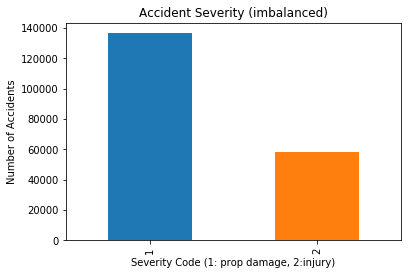

In [167]:
df.SEVERITYCODE.value_counts().plot(kind='bar')
plt.xlabel('Severity Code (1: prop damage, 2:injury)') 
plt.ylabel('Number of Accidents') 
plt.title('Accident Severity (imbalanced)')

From the above bar graph, we notice that ther is a data imbalance

In [168]:
#We will get the number of missing values in each column as - 
df.isna().sum()

SEVERITYCODE           0
X                   5334
Y                   5334
OBJECTID               0
INCKEY                 0
COLDETKEY              0
REPORTNO               0
STATUS                 0
ADDRTYPE            1926
INTKEY            129603
LOCATION            2677
EXCEPTRSNCODE     109862
EXCEPTRSNDESC     189035
SEVERITYCODE.1         0
SEVERITYDESC           0
COLLISIONTYPE       4904
PERSONCOUNT            0
PEDCOUNT               0
PEDCYLCOUNT            0
VEHCOUNT               0
INCDATE                0
INCDTTM                0
JUNCTIONTYPE        6329
SDOT_COLCODE           0
SDOT_COLDESC           0
INATTENTIONIND    164868
UNDERINFL           4884
WEATHER             5081
ROADCOND            5012
LIGHTCOND           5170
PEDROWNOTGRNT     190006
SDOTCOLNUM         79737
SPEEDING          185340
ST_COLCODE            18
ST_COLDESC          4904
SEGLANEKEY             0
CROSSWALKKEY           0
HITPARKEDCAR           0
dtype: int64

In [169]:
# Oversampling
# Separate majority and minority classes
df_majority = df[df.SEVERITYCODE==1]
df_minority = df[df.SEVERITYCODE==2]

#  We will Upsample minority class in order to remove the oversampling of the data

df_minority_upsampled = resample(df_minority, 
                                 replace=True,     # sample with replacement
                                 n_samples=136485,    # to match majority class
                                 random_state=123) # reproducible results

# Combine majority class with upsampled minority class

df_upsampled = pd.concat([df_majority, df_minority_upsampled])

# Display the new class counts

df_upsampled.SEVERITYCODE.value_counts()

2    136485
1    136485
Name: SEVERITYCODE, dtype: int64

# We will balance the Dataset

Text(0.5,1,'Accident Severity (balanced)')

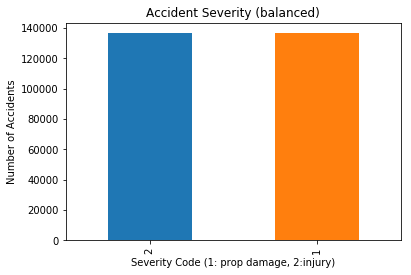

In [170]:
# Let's see how balanced the dataset using oversmapling looks.
df_upsampled.SEVERITYCODE.value_counts().plot(kind='bar')
plt.xlabel('Severity Code (1: prop damage, 2:injury)') 
plt.ylabel('Number of Accidents') 
plt.title('Accident Severity (balanced)')

In [171]:
# Rename X and Y with 'Longitude' and 'Latitude' 
df1 = df.rename(columns={'X': 'LONGITUDE', 'Y': 'LATITUDE'})
df1.head()

,SEVERITYCODE,LONGITUDE,LATITUDE,OBJECTID,INCKEY,COLDETKEY,REPORTNO,STATUS,ADDRTYPE,INTKEY,...,ROADCOND,LIGHTCOND,PEDROWNOTGRNT,SDOTCOLNUM,SPEEDING,ST_COLCODE,ST_COLDESC,SEGLANEKEY,CROSSWALKKEY,HITPARKEDCAR
0,2,-122.323148,47.703140,1,1307,1307,3502005,Matched,Intersection,37475.0,...,Wet,Daylight,NaN,NaN,NaN,10,Entering at angle,0,0,N
1,1,-122.347294,47.647172,2,52200,52200,2607959,Matched,Block,NaN,...,Wet,Dark - Street Lights On,NaN,6354039.0,NaN,11,From same direction - both going straight - bo...,0,0,N
2,1,-122.334540,47.607871,3,26700,26700,1482393,Matched,Block,NaN,...,Dry,Daylight,NaN,4323031.0,NaN,32,One parked--one moving,0,0,N
3,1,-122.334803,47.604803,4,1144,1144,3503937,Matched,Block,NaN,...,Dry,Daylight,NaN,NaN,NaN,23,From same direction - all others,0,0,N
4,2,-122.306426,47.545739,5,17700,17700,1807429,Matched,Intersection,34387.0,...,Wet,Daylight,NaN,4028032.0,NaN,10,Entering at angle,0,0,N


# Feature Engineering

In [172]:
# Drop LOCATION; Langitude and Latitude are used instead.
# Two copies of SEVERITYCODE exist, hence, we will drop the second SEVERITYCODE.
#Drop columns incluidng codes: OBJECTID, INCKEY, COLDETKEY, REPORTNO,INTKEY,EXCEPTRSNCODE, SDOT_COLCODE, SDOTCOLNUM --->
#ST_COLCODE, ST_COLDESC, SEGLANEKEY, CROSSWALKKEY 
#Drop redundant infos: STATUS, EXCEPTRSNDESC, INCDATE , INCDTTM, SDOT_COLDESC, PEDROWNOTGRNT,ST_COLDESC, UNDERINFL--->
#PEDCYLCOUNT, HITPARKEDCAR, SEVERITYDESC, ADDRTYPE  
df2 = df1.drop(["LOCATION", "SEVERITYCODE.1", "OBJECTID", "INCKEY", "COLDETKEY", "REPORTNO", "INTKEY", 
          "EXCEPTRSNCODE", "SDOT_COLCODE", "ST_COLCODE", "SEGLANEKEY", "CROSSWALKKEY", "SDOTCOLNUM", 
          "STATUS", "EXCEPTRSNDESC", "INCDATE", "INCDTTM", "SDOT_COLDESC", "PEDROWNOTGRNT", "UNDERINFL", 
        "PEDCYLCOUNT", "HITPARKEDCAR", "ST_COLDESC", "SEVERITYDESC", "ADDRTYPE", "COLLISIONTYPE", "PEDCOUNT"], axis=1)
df2.head()

,SEVERITYCODE,LONGITUDE,LATITUDE,PERSONCOUNT,VEHCOUNT,JUNCTIONTYPE,INATTENTIONIND,WEATHER,ROADCOND,LIGHTCOND,SPEEDING
0,2,-122.323148,47.703140,2,2,At Intersection (intersection related),NaN,Overcast,Wet,Daylight,NaN
1,1,-122.347294,47.647172,2,2,Mid-Block (not related to intersection),NaN,Raining,Wet,Dark - Street Lights On,NaN
2,1,-122.334540,47.607871,4,3,Mid-Block (not related to intersection),NaN,Overcast,Dry,Daylight,NaN
3,1,-122.334803,47.604803,3,3,Mid-Block (not related to intersection),NaN,Clear,Dry,Daylight,NaN
4,2,-122.306426,47.545739,2,2,At Intersection (intersection related),NaN,Raining,Wet,Daylight,NaN


In [173]:
#Getting the type of each feature
df2.dtypes

SEVERITYCODE        int64
LONGITUDE         float64
LATITUDE          float64
PERSONCOUNT         int64
VEHCOUNT            int64
JUNCTIONTYPE       object
INATTENTIONIND     object
WEATHER            object
ROADCOND           object
LIGHTCOND          object
SPEEDING           object
dtype: object

In [174]:
#Getting the shape of the data frame (Number of rows & columns)
df2.shape

(194673, 11)

In [175]:
#Getting the name of each feature of the dataset
df2.columns

Index(['SEVERITYCODE', 'LONGITUDE', 'LATITUDE', 'PERSONCOUNT', 'VEHCOUNT',
       'JUNCTIONTYPE', 'INATTENTIONIND', 'WEATHER', 'ROADCOND', 'LIGHTCOND',
       'SPEEDING'],
      dtype='object')

In [176]:
#Getting the total of 'na' values in each feature
df2.isna().sum()

SEVERITYCODE           0
LONGITUDE           5334
LATITUDE            5334
PERSONCOUNT            0
VEHCOUNT               0
JUNCTIONTYPE        6329
INATTENTIONIND    164868
WEATHER             5081
ROADCOND            5012
LIGHTCOND           5170
SPEEDING          185340
dtype: int64

In [177]:
#Returning the objects containing counts of unique values in the 'weather' column
df2['WEATHER'].value_counts()

Clear                       111135
Raining                      33145
Overcast                     27714
Unknown                      15091
Snowing                        907
Other                          832
Fog/Smog/Smoke                 569
Sleet/Hail/Freezing Rain       113
Blowing Sand/Dirt               56
Severe Crosswind                25
Partly Cloudy                    5
Name: WEATHER, dtype: int64

# Missing DATA Treatment

In [178]:
# Replacing NaN value with the keyword "Unknown"
df2['WEATHER'].replace(np.NaN, "Unknown", inplace=True)

In [179]:
# Replacing Unknown and Other by Clear, the most frequent value of the column
encoding_WEATHER = {"WEATHER": 
                            {"Clear": 1,
                             "Unknown": 1,
                             "Other": 1,
                             "Raining": 2,
                             "Overcast": 3,
                             "Snowing": 4,
                             "Fog/Smog/Smoke": 5,
                             "Sleet/Hail/Freezing Rain": 6,
                             "Blowing Sand/Dirt": 7,
                             "Severe Crosswind": 8,
                             "Partly Cloudy": 9}}
df2.replace(encoding_WEATHER, inplace=True)
df2['WEATHER'].value_counts()

1    132139
2     33145
3     27714
4       907
5       569
6       113
7        56
8        25
9         5
Name: WEATHER, dtype: int64

In [180]:
df2['SPEEDING'].value_counts()

Y    9333
Name: SPEEDING, dtype: int64

In [181]:
# Replacing NaN value by "N"
df2['SPEEDING'].replace(np.NaN, "N", inplace=True)

In [182]:
encoding_SPEEDING = {"SPEEDING": 
                            {"Y": 1,
                             "N": 0,
                              }}
df2.replace(encoding_SPEEDING, inplace=True)
df2['SPEEDING'].value_counts()

0    185340
1      9333
Name: SPEEDING, dtype: int64

In [183]:

df2['LIGHTCOND'].value_counts()

Daylight                    116137
Dark - Street Lights On      48507
Unknown                      13473
Dusk                          5902
Dawn                          2502
Dark - No Street Lights       1537
Dark - Street Lights Off      1199
Other                          235
Dark - Unknown Lighting         11
Name: LIGHTCOND, dtype: int64

In [184]:
# Replacing NaN value by "Unknown"
df2['LIGHTCOND'].replace(np.NaN, "Unknown", inplace=True)

In [185]:
# Replacing Unknown and Other by Daylight, the most frequent value of the column
encoding_LIGHTCOND = {"LIGHTCOND": 
                            {"Daylight": 0,
                             "Unknown": 0,
                             "Other": 0,
                             "Dark - Street Lights On": 1,
                             "Dusk": 1,
                             "Dawn": 1,
                             "Dark - No Street Lights": 1,
                             "Dark - Street Lights Off": 1,
                             "Dark - Unknown Lighting": 1,
                              }}
df2.replace(encoding_LIGHTCOND, inplace=True)
df2['LIGHTCOND'].value_counts()

0    135015
1     59658
Name: LIGHTCOND, dtype: int64

In [186]:
df2['ROADCOND'].value_counts()

Dry               124510
Wet                47474
Unknown            15078
Ice                 1209
Snow/Slush          1004
Other                132
Standing Water       115
Sand/Mud/Dirt         75
Oil                   64
Name: ROADCOND, dtype: int64

In [187]:
# Replacing NaN value by "Unknown"
df2['ROADCOND'].replace(np.NaN, "Unknown", inplace=True)

In [188]:
# Replacing Unknown and Other by Dry, the most frequent value of the column
encoding_ROADCOND = {"ROADCOND": 
                            {"Dry": 1,
                             "Unknown": 1,
                             "Other": 1,
                             "Wet": 2,
                             "Ice": 3,
                             "Snow/Slush": 4,
                             "Standing Water": 5,
                             "Sand/Mud/Dirt": 6,
                             "Oil": 7,
                              }}
df2.replace(encoding_ROADCOND, inplace=True)
df2['ROADCOND'].value_counts()

1    144732
2     47474
3      1209
4      1004
5       115
6        75
7        64
Name: ROADCOND, dtype: int64

In [189]:
df2['JUNCTIONTYPE'].value_counts()

Mid-Block (not related to intersection)              89800
At Intersection (intersection related)               62810
Mid-Block (but intersection related)                 22790
Driveway Junction                                    10671
At Intersection (but not related to intersection)     2098
Ramp Junction                                          166
Unknown                                                  9
Name: JUNCTIONTYPE, dtype: int64

In [190]:
# Replacing NaN value by "Unknown"
df2['JUNCTIONTYPE'].replace(np.NaN, "Unknown", inplace=True)

In [191]:
# Replacing Unknown by Mid-Block (not related to intersection), the most frequent value of the column
encoding_JUNCTIONTYPE = {"JUNCTIONTYPE": 
                            {"Mid-Block (not related to intersection)": 1,
                             "Unknown": 1,
                             "At Intersection (intersection related)": 2,
                             "Mid-Block (but intersection related)": 3,
                             "Driveway Junction": 4,
                             "At Intersection (but not related to intersection)": 5,
                             "Ramp Junction": 6,
                              }}
df2.replace(encoding_JUNCTIONTYPE, inplace=True)
df2['JUNCTIONTYPE'].value_counts()

1    96138
2    62810
3    22790
4    10671
5     2098
6      166
Name: JUNCTIONTYPE, dtype: int64

In [192]:
df2['LONGITUDE'].value_counts()


-122.332653    265
-122.344896    254
-122.328079    252
-122.344997    239
-122.299160    231
-122.351134    212
-122.347294    190
-122.345863    163
-122.332451    160
-122.269988    152
-122.329049    147
-122.310949    146
-122.289923    142
-122.334666    138
-122.339174    136
-122.321920    136
-122.329974    135
-122.335571    133
-122.302329    132
-122.324615    131
-122.269982    130
-122.339439    129
-122.339559    129
-122.316733    128
-122.333757    128
-122.277664    128
-122.323239    126
-122.334792    125
-122.327525    121
-122.287546    121
              ... 
-122.339360      1
-122.350751      1
-122.290428      1
-122.360492      1
-122.346878      1
-122.373860      1
-122.394434      1
-122.291681      1
-122.301697      1
-122.354259      1
-122.386178      1
-122.390046      1
-122.363168      1
-122.349259      1
-122.275380      1
-122.286628      1
-122.280863      1
-122.303664      1
-122.330852      1
-122.325412      1
-122.350433      1
-122.322148 

In [193]:
# NaN values are replaced by the mean values of the column
avg_LONGITUDE = df2["LONGITUDE"].astype("float").mean(axis=0)
print("Average of LONGITUDE IS:", avg_LONGITUDE)
df2['LONGITUDE'].replace(np.NaN, avg_LONGITUDE, inplace=True)

Average of LONGITUDE IS: -122.33051843904114


In [194]:
df2['LATITUDE'].value_counts()

47.708655    265
47.717173    254
47.604161    252
47.725036    239
47.579673    231
47.570942    212
47.647172    190
47.612991    161
47.607266    160
47.522816    152
47.595116    146
47.568882    142
47.609685    138
47.708586    136
47.613727    136
47.521783    133
47.654995    132
47.708603    131
47.524739    130
47.608325    129
47.551176    128
47.612889    128
47.608693    128
47.547024    126
47.549191    125
47.708637    124
47.604393    121
47.561759    121
47.618449    119
47.625593    118
            ... 
47.682695      1
47.519841      1
47.525527      1
47.650899      1
47.706772      1
47.670890      1
47.694802      1
47.685766      1
47.672338      1
47.532978      1
47.536708      1
47.553423      1
47.700181      1
47.576080      1
47.663402      1
47.575098      1
47.529185      1
47.562826      1
47.656247      1
47.616497      1
47.522827      1
47.694536      1
47.732090      1
47.638062      1
47.528513      1
47.556705      1
47.709101      1
47.513899     

In [195]:
# NaN values are placed by the mean values of the column
avg_LATITUDE = df2["LATITUDE"].astype("float").mean(axis=0)
print("Average of LATITUDE is:", avg_LATITUDE)
df2['LATITUDE'].replace(np.NaN, avg_LATITUDE, inplace=True)

Average of LATITUDE is: 47.619542517688615


In [196]:
df2['SEVERITYCODE'].value_counts()

1    136485
2     58188
Name: SEVERITYCODE, dtype: int64

In [200]:
df2['INATTENTIONIND'].value_counts()

Y    29805
Name: INATTENTIONIND, dtype: int64

In [204]:
#Replacing NaN value by N
df2['INATTENTIONIND'].replace(np.NaN, "N", inplace=True)
df2['INATTENTIONIND'].replace("N", 0, inplace=True)
df2['INATTENTIONIND'].replace("Y", 1, inplace=True)

In [205]:
df2['INATTENTIONIND'][0:]

0         0
1         0
2         0
3         0
4         0
5         0
6         0
7         0
8         0
9         0
10        0
11        0
12        0
13        0
14        0
15        0
16        0
17        0
18        0
19        0
20        0
21        0
22        1
23        0
24        0
25        1
26        0
27        0
28        0
29        0
         ..
194643    0
194644    0
194645    0
194646    0
194647    1
194648    0
194649    0
194650    0
194651    0
194652    1
194653    0
194654    0
194655    0
194656    0
194657    0
194658    0
194659    0
194660    0
194661    0
194662    0
194663    1
194664    0
194665    0
194666    0
194667    0
194668    0
194669    1
194670    0
194671    0
194672    0
Name: INATTENTIONIND, Length: 194673, dtype: int64

In [206]:
df2.isna().sum()

SEVERITYCODE      0
LONGITUDE         0
LATITUDE          0
PERSONCOUNT       0
VEHCOUNT          0
JUNCTIONTYPE      0
INATTENTIONIND    0
WEATHER           0
ROADCOND          0
LIGHTCOND         0
SPEEDING          0
dtype: int64

All the NA values are now replaced

In [207]:
#Getting the first five rows of the dataset
df2.head()

,SEVERITYCODE,LONGITUDE,LATITUDE,PERSONCOUNT,VEHCOUNT,JUNCTIONTYPE,INATTENTIONIND,WEATHER,ROADCOND,LIGHTCOND,SPEEDING
0,2,-122.323148,47.703140,2,2,2,0,3,2,0,0
1,1,-122.347294,47.647172,2,2,1,0,2,2,1,0
2,1,-122.334540,47.607871,4,3,1,0,3,1,0,0
3,1,-122.334803,47.604803,3,3,1,0,1,1,0,0
4,2,-122.306426,47.545739,2,2,2,0,2,2,0,0


In [208]:
df2.columns

Index(['SEVERITYCODE', 'LONGITUDE', 'LATITUDE', 'PERSONCOUNT', 'VEHCOUNT',
       'JUNCTIONTYPE', 'INATTENTIONIND', 'WEATHER', 'ROADCOND', 'LIGHTCOND',
       'SPEEDING'],
      dtype='object')

# Methodology

After the features are selected, they are taken in a final dataset for an explanatory data analysis to figure out more about their effects. The focus is on identifying the feature conditions that have a bigger effect on the severity that leads to injuries. To do so, the dataset is filtered further and the corresponding values of features are sorted.

In the next step, the features are processed for predictive modeling analysis. 4 machine learning models are created using the classification techniques as listed below:

Decision Tree
Logistic Regression
Random Forest
K-Nearest Neighbors (KNN)
The created models are tested and then evaluated based on their accuracy score to find the best accurate model.

# Exploratory Data Analysis

The map with markers of the accident locations in Seattle

In [209]:
#Installing Folium Package for mapping
'''
!conda install -c conda-forge folium=0.5.0 --yes
import folium

print('Folium installed and imported!')


'''


"\n!conda install -c conda-forge folium=0.5.0 --yes\nimport folium\n\nprint('Folium installed and imported!')\n\n\n"

In [210]:
import folium
#Visualizing 300 data points on the map
limit = 300
df_m1 = df2[["LATITUDE", "LONGITUDE"]]
df_m2 = df_m1.iloc[0:limit, :]

In [211]:
# Instantiate a feature group for the incidents in the dataframe

Seattle_map = folium.Map(location=[47.6062, -122.3321], zoom_start=12)

incidents = folium.map.FeatureGroup()

# loop through the 300 points and add each to the incidents feature group
for lat, lng, in zip(df_m2.LATITUDE, df_m2.LONGITUDE):
    incidents.add_child(
        folium.features.CircleMarker(
            [lat, lng],
            radius=5, # define how big you want the circle markers to be
            color='yellow',
            fill=True,
            fill_color='blue',
            fill_opacity=0.6
        )
    )

#We will add incidents to map for the visualization
Seattle_map.add_child(incidents)

In [212]:
#Selecting the severity code of 2 i.e. with injuries and making  another data frame for this purpose
Sev_2 = df2.loc[df2['SEVERITYCODE']==2]
Sev_2.head()

,SEVERITYCODE,LONGITUDE,LATITUDE,PERSONCOUNT,VEHCOUNT,JUNCTIONTYPE,INATTENTIONIND,WEATHER,ROADCOND,LIGHTCOND,SPEEDING
0,2,-122.323148,47.703140,2,2,2,0,3,2,0,0
4,2,-122.306426,47.545739,2,2,2,0,2,2,0,0
7,2,-122.320780,47.614076,3,1,2,0,1,1,0,0
9,2,-122.384700,47.528475,2,2,2,0,1,1,0,0
14,2,-122.317414,47.664028,2,2,1,0,1,1,1,0


# Relationship between the weather conditions and the accident severity with injury

In [213]:
Sev_2_w = Sev_2['WEATHER'].value_counts()
Sev_2_w

1    37856
2    11176
3     8745
5      187
4      171
6       28
7       15
8        7
9        3
Name: WEATHER, dtype: int64

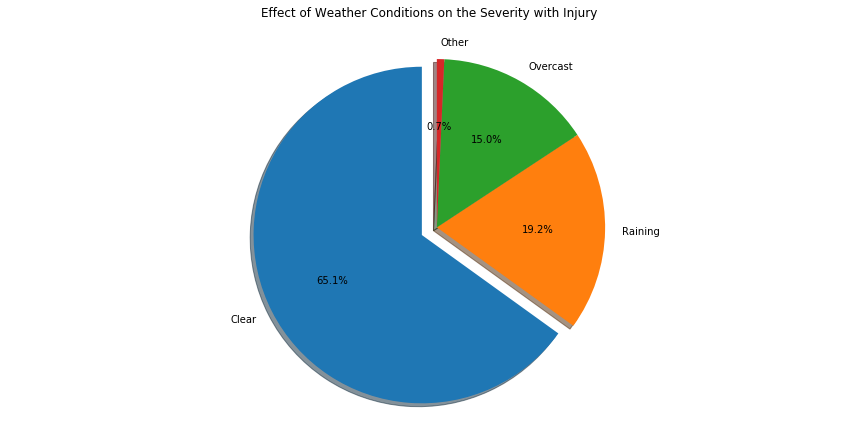

In [214]:
labels = 'Clear', 'Raining', 'Overcast', 'Other'
sizes = [37856, 11176, 8745, sum(Sev_2_w[3:9])]
explode = (0.1,0, 0, 0)
fig1, ax1 = plt.subplots(figsize=(15,7))
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title('Effect of Weather Conditions on the Severity with Injury', y=1.05)
plt.show()

# Relationship between the person count and the accident severity with injury

In [215]:

Sev_2_p = Sev_2['PERSONCOUNT'].value_counts()
Sev_2_p

2     27811
3     13461
4      6295
1      3296
5      2969
0      1762
6      1357
7       637
8       284
9       129
10       74
11       33
12       20
13       12
17        8
15        7
14        7
16        5
22        2
19        2
34        2
23        1
32        1
28        1
27        1
25        1
24        1
48        1
37        1
54        1
39        1
20        1
18        1
81        1
29        1
30        1
Name: PERSONCOUNT, dtype: int64

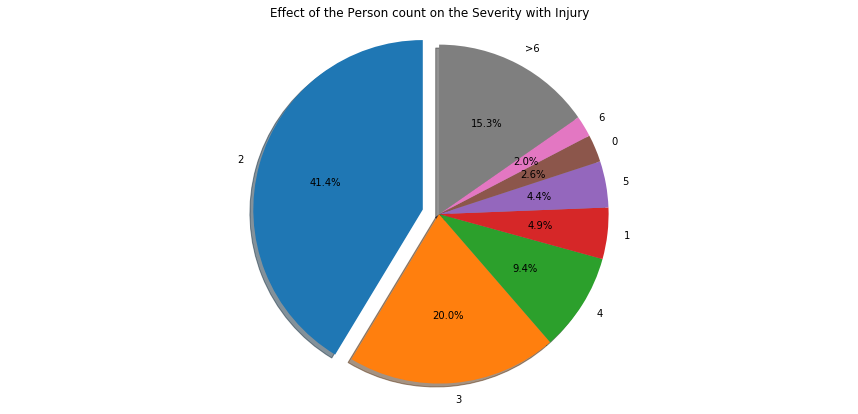

In [216]:
labels = 2, 3, 4, 1, 5, 0, 6, '>6'
sizes = [27811, 13461, 6295, 3296, 2969, 1762, 1357, sum(Sev_2_p[3:9])]
explode = (0.1, 0, 0, 0, 0, 0, 0, 0)
fig1, ax1 = plt.subplots(figsize=(15,7))
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie chart is drawn as a circle.
plt.title('Effect of the Person count on the Severity with Injury', y=1)
plt.show()

# Relationship between the vehicle count and the accident severity with injury

In [217]:
Sev_2_v = Sev_2['VEHCOUNT'].value_counts()
Sev_2_v

2     35949
1     14105
3      5470
0      1227
4      1078
5       261
6        60
7        22
9         6
8         5
11        3
10        2
Name: VEHCOUNT, dtype: int64

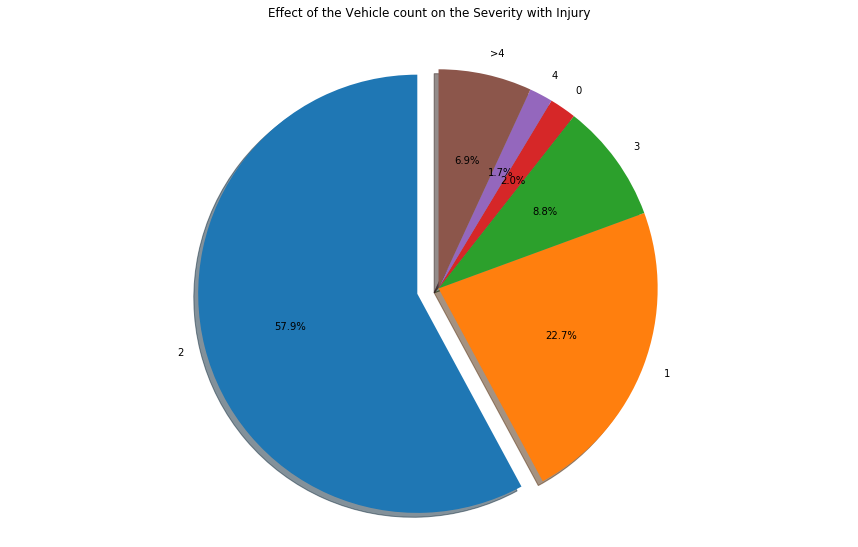

In [218]:
labels = 2, 1, 3, 0, 4,'>4'
sizes = [35949, 14105, 5470, 1227, 1078, sum(Sev_2_p[5:12])]
explode = (0.1, 0, 0, 0, 0, 0)
fig1, ax1 = plt.subplots(figsize=(15,9))
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title('Effect of the Vehicle count on the Severity with Injury', y=1.05)
plt.show()

# Relationship between the junction type and the accident severity with injury

In [219]:
Sev_2_j = Sev_2['JUNCTIONTYPE'].value_counts()
Sev_2_j

2    27174
1    19806
3     7297
4     3234
5      623
6       54
Name: JUNCTIONTYPE, dtype: int64

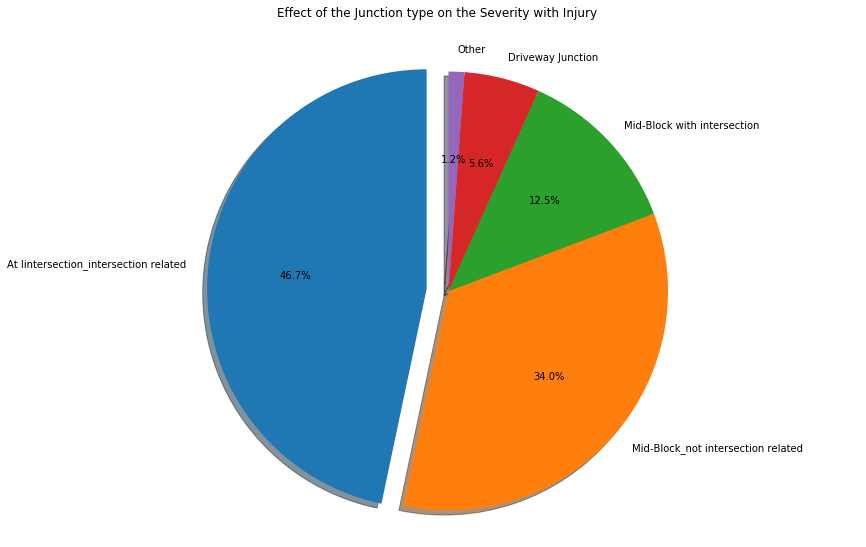

In [220]:

labels = 'At Iintersection_intersection related', 'Mid-Block_not intersection related', 'Mid-Block with intersection', 'Driveway Junction', 'Other'
sizes = [27174, 19806, 7297, 3234, sum(Sev_2_j[4:6])]
explode = (0.1, 0, 0, 0, 0)
fig1, ax1 = plt.subplots(figsize=(15,9))
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title('Effect of the Junction type on the Severity with Injury', y=1.05)
plt.show()

# Relationship between the inattention and the accident severity with injury

In [221]:
Sev_2_i = Sev_2['INATTENTIONIND'].value_counts()
Sev_2_i

0    47791
1    10397
Name: INATTENTIONIND, dtype: int64

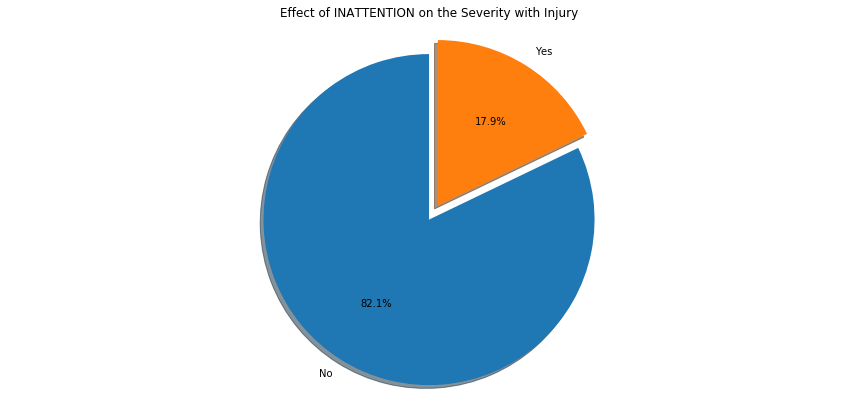

In [222]:
labels = 'No', 'Yes'
sizes = [47791, 10397]
explode = (0.1, 0)
fig1, ax1 = plt.subplots(figsize=(15,7))
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title('Effect of INATTENTION on the Severity with Injury', y=1)
plt.show()

# Relationship between the road conditions and the accident severity with injury

In [223]:
Sev_2_r = Sev_2['ROADCOND'].value_counts()
Sev_2_r

1    41916
2    15755
3      273
4      167
5       30
7       24
6       23
Name: ROADCOND, dtype: int64

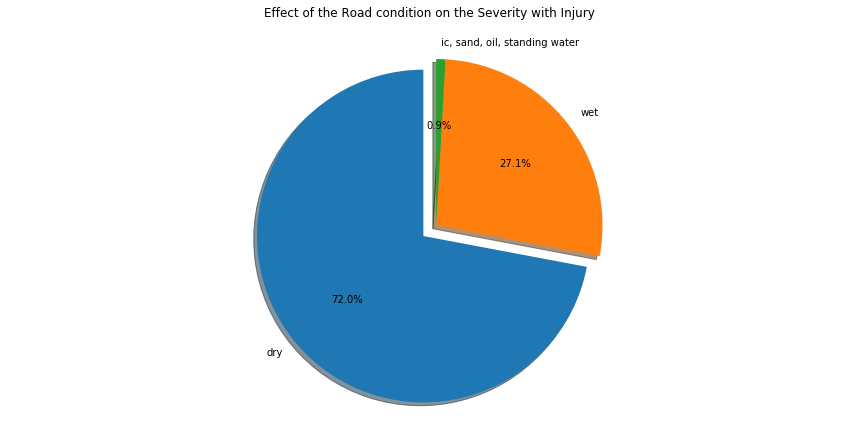

In [224]:

labels = 'dry', 'wet', 'ic, sand, oil, standing water'
sizes = [41916, 15755, sum(Sev_2_r[2:7])]
explode = (0.1, 0, 0)
fig1, ax1 = plt.subplots(figsize=(15,7))
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title('Effect of the Road condition on the Severity with Injury', y=1.05)
plt.show()

# Relationship between the light conditions and the accident severity with injury

In [225]:
Sev_2_l = Sev_2['LIGHTCOND'].value_counts()
Sev_2_l

0    40291
1    17897
Name: LIGHTCOND, dtype: int64

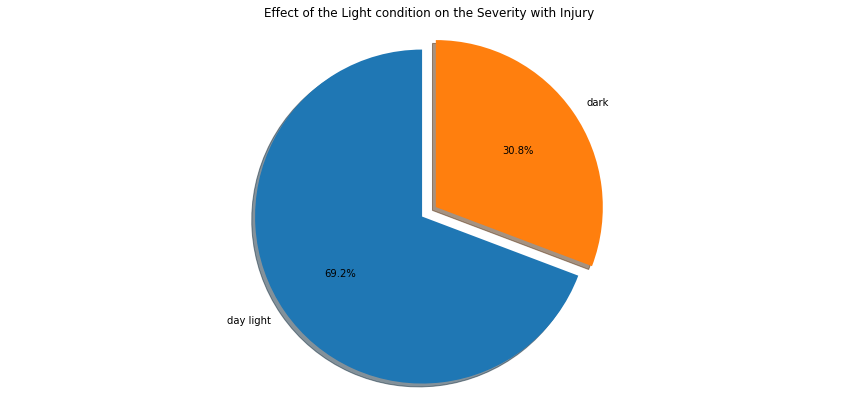

In [226]:
labels = 'day light', 'dark'
sizes = [40291, 17897]
explode = (0.1, 0)
fig1, ax1 = plt.subplots(figsize=(15,7))
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title('Effect of the Light condition on the Severity with Injury', y=1)
plt.show()

# Relationship between the speeding and the accident severity with injury

In [227]:
Sev_2_s = Sev_2['SPEEDING'].value_counts()
Sev_2_s

0    54657
1     3531
Name: SPEEDING, dtype: int64

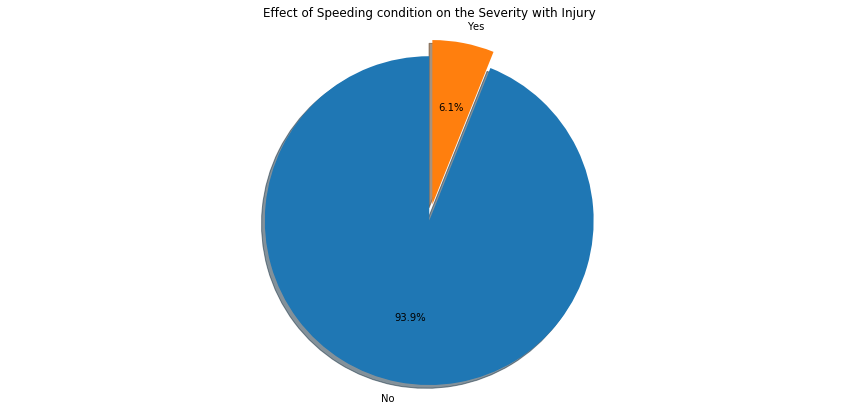

In [228]:
labels = 'No', 'Yes'
sizes = [54657, 3531]
explode = (0.1, 0)
fig1, ax1 = plt.subplots(figsize=(15,7))
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title('Effect of Speeding condition on the Severity with Injury', y=1)
plt.show()

# Modeling, Testing and Evaluation

In [229]:
#Making a new data frame with the independant variables
Feature = df2[['LONGITUDE', 'LATITUDE', 'PERSONCOUNT', 'VEHCOUNT',
       'JUNCTIONTYPE', 'INATTENTIONIND', 'WEATHER', 'ROADCOND', 'LIGHTCOND',
       'SPEEDING']]

In [230]:
X = Feature

In [231]:
y = df2['SEVERITYCODE'].values

In [232]:
X.head()

,LONGITUDE,LATITUDE,PERSONCOUNT,VEHCOUNT,JUNCTIONTYPE,INATTENTIONIND,WEATHER,ROADCOND,LIGHTCOND,SPEEDING
0,-122.323148,47.703140,2,2,2,0,3,2,0,0
1,-122.347294,47.647172,2,2,1,0,2,2,1,0
2,-122.334540,47.607871,4,3,1,0,3,1,0,0
3,-122.334803,47.604803,3,3,1,0,1,1,0,0
4,-122.306426,47.545739,2,2,2,0,2,2,0,0


Now, we will Normalize the Data in order to make the data on a same scale.

In [233]:
X= preprocessing.StandardScaler().fit(X).transform(X)


# Train-test split

In [234]:
#Splitting the data into train-test sets
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=4)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (155738, 10) (155738,)
Test set: (38935, 10) (38935,)


# K-Nearest Neighbours (KNN)


In [235]:
#Finding the best value of 'k'
Ks = 10
mean_acc = np.zeros((Ks-1))
std_acc = np.zeros((Ks-1))
ConfustionMx = [];
for n in range(1,Ks):
    
    #Train the Model and find the Predictions  
    kNNeigh = KNeighborsClassifier(n_neighbors = n).fit(X_train,y_train)
    yhat = kNNeigh.predict(X_test)
    
    
    mean_acc[n-1] = metrics.accuracy_score(y_test, yhat);
    
    std_acc[n-1]=np.std(yhat==y_test)/np.sqrt(yhat.shape[0])

mean_acc

array([0.66605882, 0.71539746, 0.6977013 , 0.72559394, 0.71442147,
       0.73132143, 0.72153589, 0.73293951, 0.72677539])

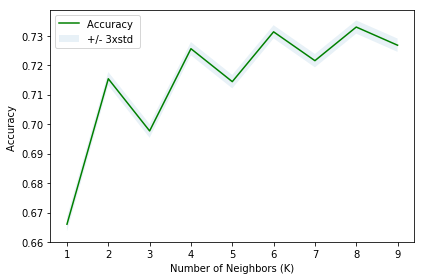

In [236]:
#Plot model accuracy for Different number of 'k' Neighbors
plt.plot(range(1,Ks),mean_acc,'g')
plt.fill_between(range(1,Ks),mean_acc - 1 * std_acc,mean_acc + 1 * std_acc, alpha=0.10)
plt.legend(('Accuracy ', '+/- 3xstd'))
plt.ylabel('Accuracy ')
plt.xlabel('Number of Neighbors (K)')
plt.tight_layout()
plt.show()

In [237]:
print( "Best k =", mean_acc.argmax()+1)

Best k = 8


In [238]:
#Building the model using the best k (i.e. 8)
k=8
kNNeigh= KNeighborsClassifier(n_neighbors = k).fit(X_train,y_train)
kNNeigh

KNeighborsClassifier(n_neighbors=8)

Evaluation - K Nearest Neighbors

In [239]:
print("K-Nearest Neighbour's Accuray is : ", metrics.accuracy_score(y_test, yhat))

K-Nearest Neighbour's Accuray is :  0.7267753948889174


# Decision Tree

In [240]:
#Model Building using decision tree classifier
DTree = DecisionTreeClassifier(criterion="entropy", max_depth = 4)
DTree.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=4)

In [241]:
#Prediction of the model
yhat = DTree.predict(X_test)
yhat

array([1, 1, 1, ..., 1, 1, 1], dtype=int64)

Evaluation - Decision Tree

In [242]:
#Evalaution of the model
print("Decision Trees's Accuracy is: ", metrics.accuracy_score(y_test, yhat))

Decision Trees's Accuracy is:  0.7429562090663927


# Logistic Regression

In [243]:
#Model building
LR = LogisticRegression(C=0.01, solver='liblinear').fit(X_train,y_train)
LR

LogisticRegression(C=0.01, solver='liblinear')

In [244]:
#Prediction of the model
yhat = LR.predict(X_test)
yhat

array([1, 1, 1, ..., 1, 1, 1], dtype=int64)

Evaluation - Logistic Regression

In [245]:
#Evalaution of the model
print("Logistic Regresion's Accuracy is: ", metrics.accuracy_score(y_test, yhat))

Logistic Regresion's Accuracy is:  0.7030949017593425


# Random Forest

In [246]:
#Model building
clf=RandomForestClassifier(n_estimators=100)
clf.fit(X_train,y_train)

RandomForestClassifier()

In [247]:
#Prediction of the model
yhat =clf.predict(X_test)

Evaluation - Random Forest Classifier

In [248]:
#Evalaution of the model
print("Random Forest's Accuracy is: ", metrics.accuracy_score(y_test, yhat))

Random Forest's Accuracy is:  0.7108771028637473


# Now, we will visualize important features from the dataset using Random Forest


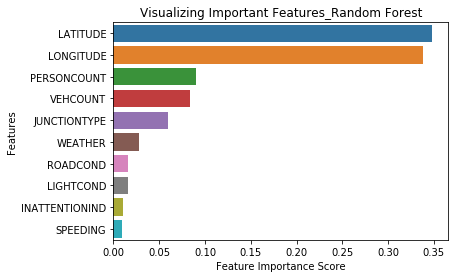

In [249]:
# Create a list of feature names that we are using for creating the model
feat_labels = ['SEVERITYCODE', 'LONGITUDE', 'LATITUDE','PERSONCOUNT', 
               'VEHCOUNT', 'JUNCTIONTYPE', 'INATTENTIONIND',
               'WEATHER', 'ROADCOND', 'LIGHTCOND', 'SPEEDING']
# Set the target (dependant variable) for the prediction

target='SEVERITYCODE'

# Create arrays for the features and the response variable

# set X and y
y = df2[target]
X = df2.drop(target, axis=1)

# Split the data set into training and testing data sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=21, stratify=y)

# Create a random forest classifier
clf = RandomForestClassifier(n_estimators=100)

# Fitting the model
clf.fit(X_train, y_train)

feature_imp = pd.Series(clf.feature_importances_,index=X.columns).sort_values(ascending=False)

# Creating a horizontal bar plot, displaying only the top k features
k=10
sns.barplot(x=feature_imp[:10], y=feature_imp.index[:k])
# Add labels to your graph
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features_Random Forest")
plt.show()

From the above graph, it is clear that 'LATITUDE' is the most important predictor & 'SPEEDING' is the least.

# Results and Discussion

Plot the 'Accuracy score' against all the machine learning algorithms that are used in this project.

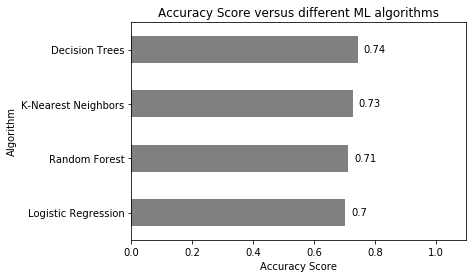

In [250]:
algo_lst =['K-Nearest Neighbors','Decision Trees','Logistic Regression','Random Forest']

accuracy_lst = [0.7267753948889174, 0.7429562090663927, 0.7030949017593425, 0.711878772312829]

# Generate a list of ticks for y-axis
y_ticks=np.arange(len(algo_lst))

#Combine the list of algorithms and list of accuracy scores into a dataframe, sort the value based on accuracy score
df_acc=pd.DataFrame(list(zip(algo_lst, accuracy_lst)), columns=['Algorithm','Accuracy_Score']).sort_values(by=['Accuracy_Score'],ascending = True)

# Make a horizontal bar chart
ax=df_acc.plot.barh('Algorithm', 'Accuracy_Score', align='center',legend=False,color='0.5')

# Add the data label on to the plot
for i in ax.patches:
    # get_width pulls left or right; get_y pushes up or down
    ax.text(i.get_width()+0.02, i.get_y()+0.2, str(round(i.get_width(),2)), fontsize=10)

# Set the limit, lables, ticks and title
plt.xlim(0,1.1)
plt.xlabel('Accuracy Score')
plt.yticks(y_ticks, df_acc['Algorithm'], rotation=0)
plt.title('Accuracy Score versus different ML algorithms')

plt.show()

# Conclusion

After comparing the score of accuracies obtained by the different machine learning algorithms K-Nearest Neighbors, Decision Tree, Logistic Regression, and Random Forest; Decision Tree algorithm has been proved to give the  better accuracy.

During the modeling with K-Nearest Neighbors classifier, it was observed that the computer required much more time. But it took less time to execute the decision tree modeling. This can also represent better effectiveness and compatibility of the decision tree for handling this given dataset.

In this study, supervised machine learning is applied to predict car accident severity. The imbalanced dataset is initially balanced, and the raw data is analyzed and prepared in different steps to be fed into the machine learning models. In parallel, an explanatory data analysis is done to gain more insights into the relationship between the features and the severity of the accidents.

Four machine learning algorithms (K-Nearest Neighbors, Decision Trees, Logistic Regression, and Random Forest) are applied in which the decision tree has shown better compatibility with the dataset, resulting in higher accuracy (0.74).

One idea for future work can be applying feature selection algorithms such as LASSO to better select features. Enriching data further with other approaches to handling missing values can potentially improve prediction accuracy. Furthermore, testing other attributes related to car drivers, such as their age, can also be useful in better predicting car accident severity. Last but not least, performing k-fold cross-validation to obtain the optimal value of K in the KNN classifier may increase the accuracy as well.